In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

In [72]:
data=pd.read_excel("car_data.xlsx",sheet_name='cars_bangalore')

In [73]:
data.sample()

,Brand,Model,Year,Fuel Type,Kilometer,Price,City
2852,Maruti Suzuki,Alto,2008,Petrol+CNG,92763,90000,Ahmedabad


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6077 entries, 0 to 6076
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Brand      6077 non-null   object
 1   Model      6077 non-null   object
 2   Year       6077 non-null   int64 
 3   Fuel Type  6077 non-null   object
 4   Kilometer  6077 non-null   int64 
 5   Price      6077 non-null   int64 
 6   City       6077 non-null   object
dtypes: int64(3), object(4)
memory usage: 332.5+ KB


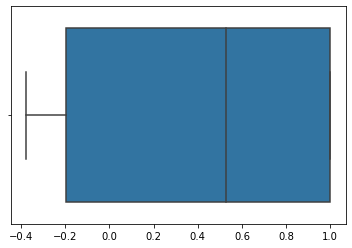

In [75]:
sns.boxplot(data.corr())

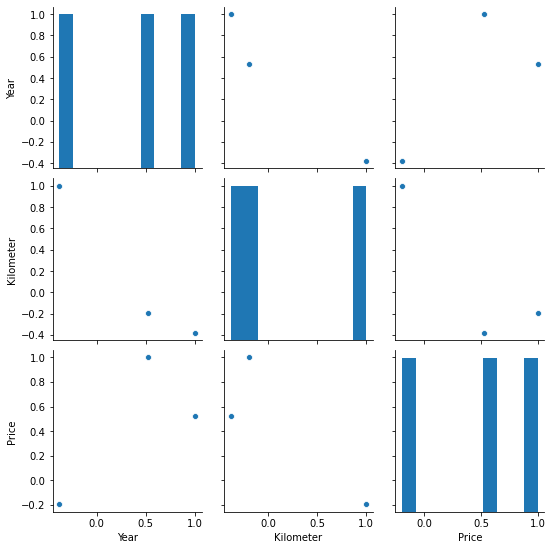

In [71]:
sns.pairplot(data.corr())

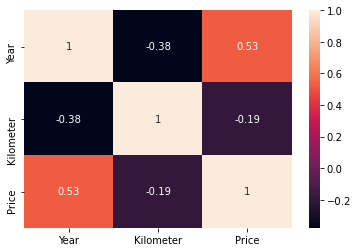

In [78]:
sns.heatmap(data.corr(method ='pearson'),annot=True)

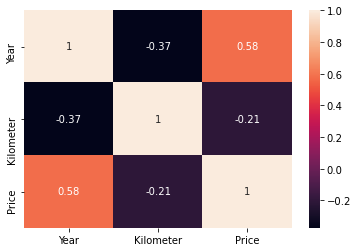

In [77]:
sns.heatmap(data.corr(method ='kendall'),annot=True)

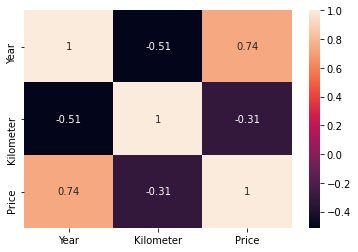

In [8]:
sns.heatmap(df.corr(method ='spearman'),annot=True)

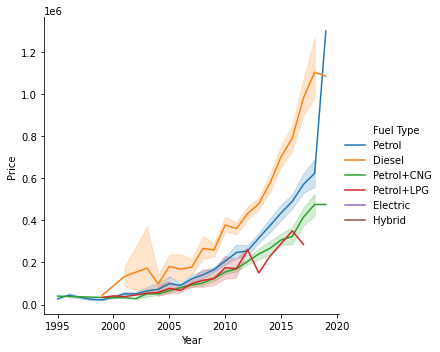

In [9]:
sns.relplot('Year','Price',data=df,hue="Fuel Type",kind='line')

In [39]:
data.sample()

,Model,Year,Kilometer,Price
126,Aveo,2009,48069,90000


In [80]:
data.columns

Index(['Brand', 'Model', 'Year', 'Fuel Type', 'Kilometer', 'Price', 'City'], dtype='object')

In [81]:
x=data[['Year','Kilometer']]

y=data['Price']

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
lm=LinearRegression()

In [86]:
lm.fit(X_train,y_train)

LinearRegression()

In [87]:
print(lm.intercept_)

-104811307.5540795


In [88]:
lm.coef_

array([ 5.22915518e+04, -5.92603926e-03])

In [89]:
pd.DataFrame(lm.coef_,X_train.columns,columns=['Coeff'])

,Coeff
Year,52291.551836
Kilometer,-0.005926


In [90]:
predictions=lm.predict(X_test)

In [91]:
predictions

array([555822.17161147, 189956.64840721, 608326.94234043, ...,
       189246.32371096,  32822.32570994, 607939.87123391])

In [92]:
y_test

3318    280000
296      67000
346     220000
3700    380000
544     110000
         ...  
503     180000
4554    320000
318      77000
2142    125000
3101    510000
Name: Price, Length: 1824, dtype: int64

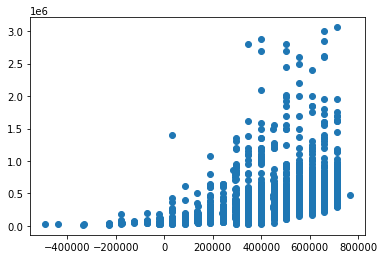

In [93]:
plt.scatter(predictions,y_test)

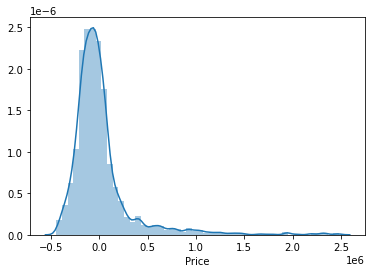

In [94]:
sns.distplot(y_test-predictions)